In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import yaml

from astropy.table import Table

%load_ext autoreload
%autoreload 2
sys.path.insert(1, '../code')
import utils

In [3]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'xx-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)

In [4]:
sim_name = 'TNG100-1'

# Halos all

In [5]:
halo_tag = ''

In [6]:
fn_halos = f'../data/halo_tables/halos_{sim_name}{halo_tag}.fits'

In [7]:
tab_halos = Table.read(fn_halos)

In [7]:
print(len(tab_halos))
print(tab_halos.columns)

107597
<TableColumns names=('idx_halo_dark','idx_subhalo_dark','idx_subhalo_hydro','idx_halo_hydro','m200m','r200m','v200m','x_com','x_grouppos','x_minPE','spin_subhalo','mstellar','rstellar','mgas','mbh','mbh_per_mstellar','sfr','sfr1','gband','gband_minus_iband','jstellar','m200m_hydro','npartstellar','npartgas','m200m_fof','r200m_fof','v200m_fof','m200m_fof_rmax','r200m_fof_rmax','v200m_fof_rmax','log_m200m','log_m200m_fof','log_m200m_hydro','log_mstellar','log_mgas','log_mbh','log_mbh_per_mstellar','log_rstellar','log_r200m','log_jstellar','log_ssfr','log_ssfr1','m200c','veldisp_subhalo','c200c','a_form','log_M200c_Msun_structure')>


In [20]:
np.min(tab_halos['log_m200m']), np.max(tab_halos['log_m200m']), np.median(tab_halos['log_m200m'])

(10.000064, 14.563137, 10.338513374328613)

Text(0, 0.5, 'number per bin')

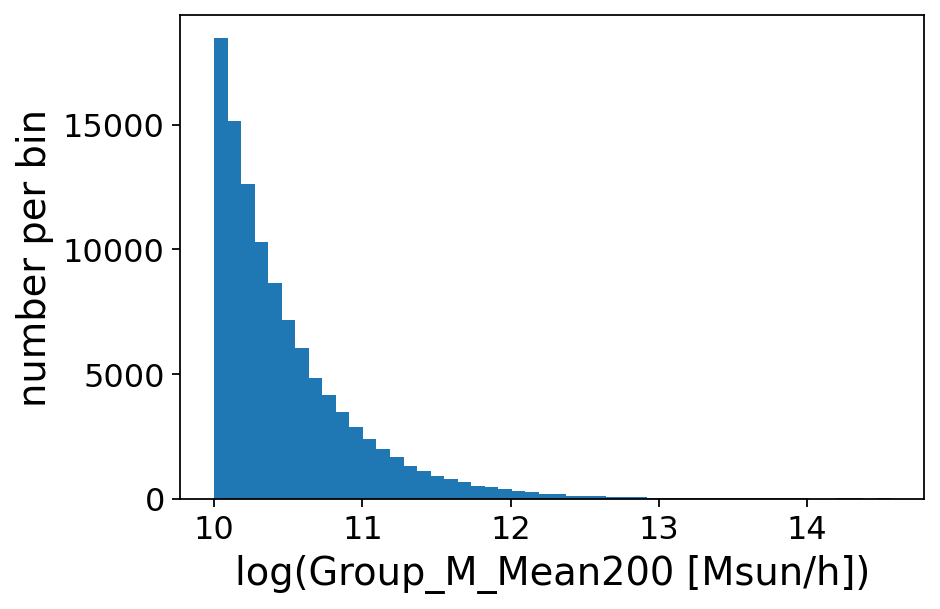

In [21]:
plt.hist(tab_halos['log_m200m'], bins=50)
plt.xlabel('log(Group_M_Mean200 [Msun/h])')
plt.ylabel('number per bin')

Text(0, 0.5, 'number per bin')

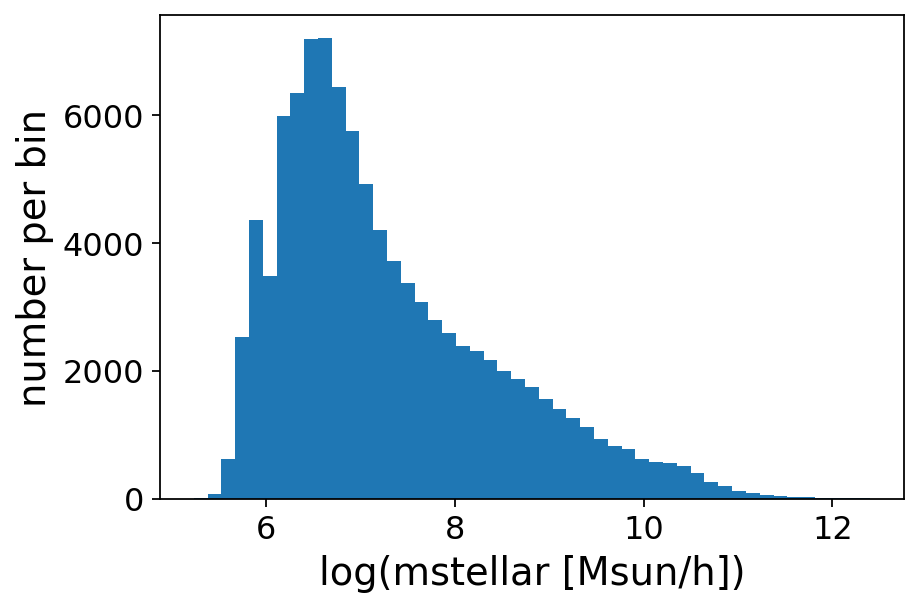

In [23]:
x_min = np.min(tab_halos['log_mstellar'][tab_halos['log_mstellar'] > -np.inf])
bins = np.linspace(x_min, np.max(tab_halos['log_mstellar']), 50)
plt.hist(tab_halos['log_mstellar'], bins=bins)
plt.xlabel('log(mstellar [Msun/h])')
plt.ylabel('number per bin')

Text(0, 0.5, 'number per bin')

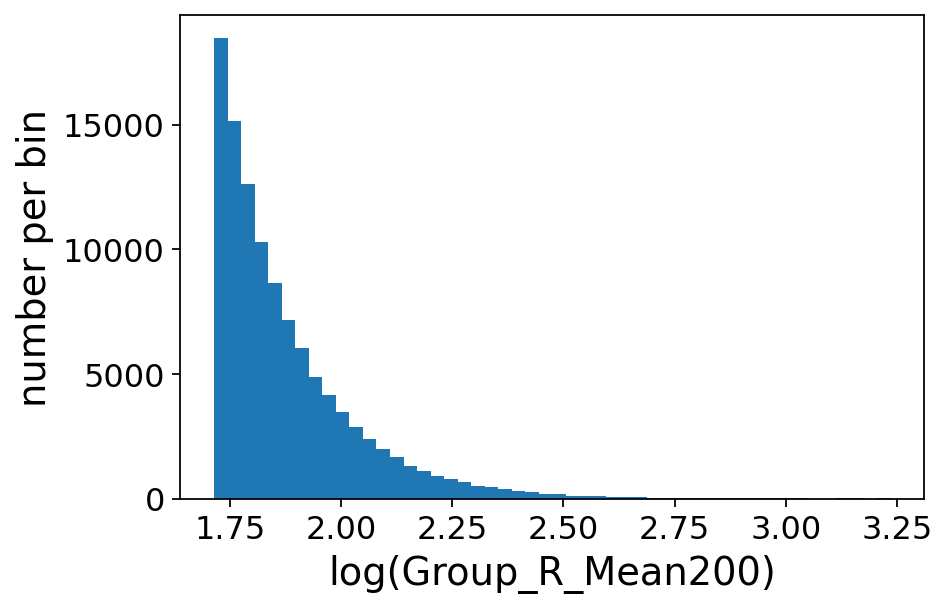

In [24]:
plt.hist(np.log10(tab_halos['r200m']), bins=50)
plt.xlabel('log(Group_R_Mean200)')
plt.ylabel('number per bin')

Text(0, 0.5, 'log(m200m_fof)')

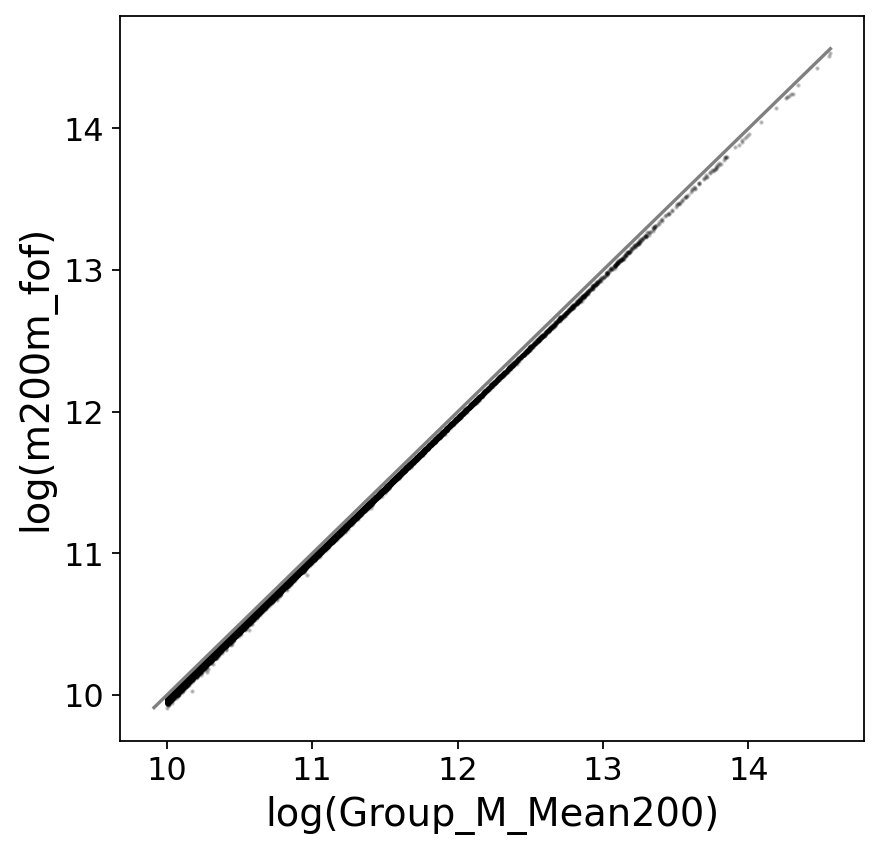

In [26]:
plt.figure(figsize=(6,6))
xx = np.linspace(np.min(tab_halos['log_m200m_fof']), np.max(tab_halos['log_m200m']))
plt.plot(xx, xx, color='grey')
plt.scatter(tab_halos['log_m200m'], tab_halos['log_m200m_fof'], color='k', alpha=0.2, s=1)
plt.xlabel('log(Group_M_Mean200)')
plt.ylabel('log(m200m_fof)')

## Mini

In [32]:
sim_name = 'TNG100-1'
halo_tag = '_mini10'
fn_halos = f'../data/halo_tables/halos_{sim_name}{halo_tag}.fits'

In [33]:
tab_halos = Table.read(fn_halos)

In [34]:
print(len(tab_halos))
print(tab_halos.columns)

10
<TableColumns names=('idx_halo_dark','idx_subhalo_dark','idx_subhalo_hydro','idx_halo_hydro','m200m','r200m','v200m','x_com','x_grouppos','x_minPE','spin_subhalo','m200m_hydro','mstellar','rstellar','mgas','mbh','mbh_per_mstellar','npartstellar','npartgas','sfr','sfr1','gband','gband_minus_iband','jstellar','m200m_fof_rmax','r200m_fof_rmax','v200m_fof_rmax','m200m_fof','v200m_fof','log_m200m','log_m200m_fof','log_m200m_hydro','log_mstellar','log_mgas','log_mbh','log_mbh_per_mstellar','log_rstellar','log_r200m','log_jstellar','log_ssfr','log_ssfr1','veldisp_subhalo','m200c','c200c','a_form','M200c_structure')>


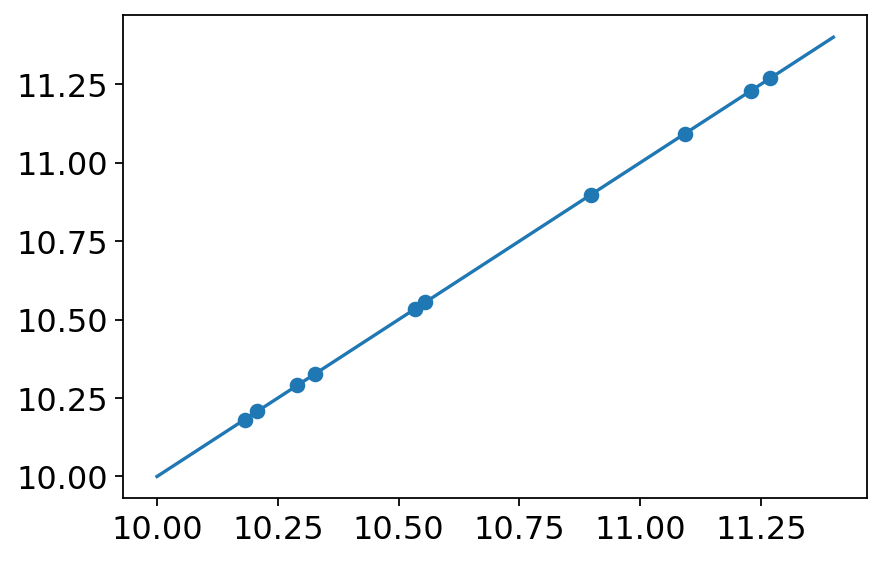

In [43]:
xx = np.linspace(10, 11.4)
plt.plot(xx, xx)
plt.scatter(np.log10(tab_halos['m200c']/0.6774)+10, tab_halos['M200c_structure'])

# select

In [9]:
# Load config
fn_select_config = f'../configs/halo_selection_{sim_name}{halo_tag}.yaml'
with open(fn_select_config, 'r') as file:
    select_params = yaml.safe_load(file)
tab_select = utils.load_table(select_params['select']['fn_select'])

# geos

In [28]:
halo_tag = ''
geo_tag = ''

fn_geo_config = f'../configs/geo_{sim_name}{halo_tag}{geo_tag}.yaml'

with open(fn_geo_config, 'r') as file:
    geo_params = yaml.safe_load(file)
gp = geo_params['geo']

In [29]:
fn_geo_features = gp['fn_geo_features']
fn_geo_info = gp['fn_geo_info']

In [30]:
tab_geos = Table.read(fn_geo_features)

In [31]:
tab_geos

idx_halo_dark,g_{000},g_{001},g_{002},g_{003},g_{004},g_{005},g_{006},g_{007},g_{008},g_{009},g_{010} [3],g_{011} [3],g_{012} [3],g_{013} [3],g_{014} [3],g_{015} [3],g_{016} [3],g_{017} [3],g_{018} [3],g_{019} [3],"g_{020} [3,3]","g_{021} [3,3]","g_{022} [3,3]","g_{023} [3,3]","g_{024} [3,3]","g_{025} [3,3]","g_{026} [3,3]","g_{027} [3,3]","g_{028} [3,3]","g_{029} [3,3]",g_{100} [3],g_{101} [3],g_{102} [3],g_{103} [3],g_{104} [3],g_{105} [3],g_{106} [3],g_{107} [3],g_{108} [3],g_{109} [3],"g_{110}_A [3,3]","g_{111}_A [3,3]","g_{112}_A [3,3]","g_{113}_A [3,3]","g_{114}_A [3,3]","g_{115}_A [3,3]","g_{116}_A [3,3]","g_{117}_A [3,3]","g_{118}_A [3,3]","g_{119}_A [3,3]","g_{200} [3,3]","g_{201} [3,3]","g_{202} [3,3]","g_{203} [3,3]","g_{204} [3,3]","g_{205} [3,3]","g_{206} [3,3]","g_{207} [3,3]","g_{208} [3,3]","g_{209} [3,3]"
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,3323.564823842102,4553.038457388785,4197.2773088838385,4383.915028948345,3863.8062043093296,4073.748515684936,2947.771314312356,1883.1865288319468,1920.2880045698435,1364.8482123658086,-20073.78961363209 .. -1198410.7223027828,-156813.7030526573 .. -1145055.260962803,-483609.1231718507 .. -842907.6135461715,-613521.3031491357 .. -1015082.846022426,-69989.88178227934 .. -486799.2612046849,248727.6362304018 .. 156894.01434743608,114133.3610933238 .. 368504.33579189976,111485.49744181219 .. 155107.76343922605,108624.72924763094 .. 14000.424220482822,78556.60390755822 .. 47512.7076390639,1342561397.9557261 .. 2339843354.1185837,1795253242.519671 .. 2848632395.977772,1450329379.9632761 .. 2772320590.312209,1495496864.6034102 .. 3163415693.1825576,1046862454.605152 .. 2745821411.16712,864891019.932575 .. 3476438198.462814,589438600.0159024 .. 2084220606.7954865,325191769.43643546 .. 1185229758.6174767,314618666.0377191 .. 982743659.5865307,218321947.87633374 .. 541567392.3995409,2305.1918604652415 .. 5089.113248449113,-5644.004910646454 .. -45441.50984386918,-980.2174325453949 .. -243147.19620743606,-123824.3648278866 .. -653852.8718202261,-52778.73525480418 .. -800848.7284251889,98239.81660060976 .. -1042853.5088675056,112660.18001150695 .. -1280276.6002253953,43867.07027706603 .. -759085.7535633898,118565.14589720716 .. -460557.0749245786,25730.85693689386 .. -438216.756740953,-521866.5874821026 .. -5808129.598486826,-39491148.56518618 .. -3672196.1616605176,-67005797.192457564 .. -95058320.80689362,27797629.06131135 .. -31132374.598490708,-115413711.71539 .. -287744900.8825009,-176191780.29109085 .. -1579701255.5572855,-188789404.87652797 .. -1178325232.9067037,-63244595.28378779 .. -826748717.6447195,8691854.238033032 .. -841830586.8712955,-3012898.9217154584 .. -583575445.1692721,11395359.649973001 .. 16219315.00664941,84384205.59902024 .. 127717629.85332966,192653146.21051535 .. 353382823.5277688,375930686.70851445 .. 786538090.2044475,428701053.2087277 .. 1197751616.667119,590526242.4276928 .. 2209400700.5618362,569242284.7257038 .. 2094804536.1992385,439013764.57199454 .. 1849171524.002363,557056899.6365607 .. 2320436116.917934,446373068.09724617 .. 2457070026.600709
1,2215.757680082391,2971.2216980619546,4145.032018577463,5451.840441167683,5028.8041818755955,4285.87111398031,3369.340049717335,3280.7462446208638,2596.1391516582194,873.781481463248,-221509.97933797725 .. 97603.73790511338,-298158.764506843 .. 124358.4020068554,-371836.991158876 .. 187425.2198743156,142697.29830173458 .. -469999.1643195935,-288850.04295725375 .. -221521.37477713628,-404089.9496340099 .. -89276.72512626545,186679.25401815638 .. -34665.18271162352,6

In [32]:
tab_geo_info = Table.read(fn_geo_info)

In [33]:
tab_geo_info

geo_key,geo_name,m_order,x_order,v_order,n,hermitian,modification
bytes9,bytes8,int64,int64,int64,int64,bool,bytes4
g_{000},m_0,1,0,0,0,True,None
g_{001},m_1,1,0,0,1,True,None
g_{002},m_2,1,0,0,2,True,None
g_{003},m_3,1,0,0,3,True,None
g_{004},m_4,1,0,0,4,True,None
g_{005},m_5,1,0,0,5,True,None
g_{006},m_6,1,0,0,6,True,None
g_{007},m_7,1,0,0,7,True,None
g_{008},m_8,1,0,0,8,True,None


In [34]:
tab_geo_info[tab_geo_info['n']==0]

geo_key,geo_name,m_order,x_order,v_order,n,hermitian,modification
bytes9,bytes8,int64,int64,int64,int64,bool,bytes4
g_{000},m_0,1,0,0,0,True,None
g_{010},v_0,1,0,1,0,True,None
g_{020},C^{vv}_0,1,0,2,0,True,None
g_{100},x_0,1,1,0,0,True,None
g_{110}_A,C^{xv}_0,1,1,1,0,False,None
g_{200},C^{xx}_0,1,2,0,0,True,None


# geos clean

In [35]:
halo_tag = ''
geo_tag = ''
geo_clean_tag = '_n3'

fn_geo_clean_config = f'../configs/geo_clean_{sim_name}{halo_tag}{geo_tag}{geo_clean_tag}.yaml'

with open(fn_geo_clean_config, 'r') as file:
    geo_clean_params = yaml.safe_load(file)
gcp = geo_clean_params['geo_clean']

In [36]:
fn_geo_clean_features = gcp['fn_geo_clean_features']
fn_geo_clean_info = gcp['fn_geo_clean_info']

In [37]:
tab_geos_clean = Table.read(fn_geo_clean_features)

In [38]:
tab_geos_clean

idx_halo_dark,g_{000},g_{010} [3],"g_{020} [3,3]",g_{100} [3],"g_{110}_symmetrized [3,3]","g_{110}_A_antisymmetrized [3,3]","g_{200} [3,3]",g_{001},g_{011} [3],"g_{021} [3,3]",g_{101} [3],"g_{111}_A_antisymmetrized [3,3]","g_{111}_symmetrized [3,3]","g_{201} [3,3]",g_{002},g_{012} [3],"g_{022} [3,3]","g_{112}_A_antisymmetrized [3,3]",g_{102} [3],"g_{112}_symmetrized [3,3]","g_{202} [3,3]"
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.10222753511161425,-0.0006815220876399484 .. -0.040687054763154505,0.050311996939823384 .. 0.0876847731890191,4.161978149181139e-05 .. 9.188292958174281e-05,-1.0400136570251722e-05 .. -0.00011574862712216823,0.0 .. 0.0,0.0001207674059145018 .. 0.00017189142416122345,0.40398791988366684,-0.04257246077014932 .. -0.10195593498423937,0.17767021829240345 .. 0.3291910007191175,-0.0023552233491229 .. -0.0170155956267756,0.0 .. 0.0,-0.0015683771700663214 .. -0.002588002068155734,0.006920119994377908 .. 0.013434364798343704,0.49378454500471874,0.020083212175181213 .. 0.008664933717551592,0.12588945436931104 .. 0.4128213555408575,0.0 .. 0.0,0.006252094926149321 .. -0.08633514359351932,-0.010720868487950074 .. -0.10558092184226398,0.03212145553681599 .. 0.12853861338054226
1,0.0647531444836056,-0.006999200045070788 .. 0.0030840510607524725,0.03055094804599347 .. 0.01928273992124171,-2.280035752213019e-05 .. -6.0533643072219686e-05,1.4092408088248064e-05 .. -6.385281229962807e-05,0.0 .. 0.0,0.000104354547002501 .. 7.297076016575589e-05,0.36728908770104374,-0.016661404590339386 .. -0.0049992430818490375,0.22535852249794217 .. 0.15153123549340566,0.011568824346514411 .. -0.0003920075697547975,0.0 .. 0.0,0.006597740778113069 .. 0.0013733121711165036,0.009632179162954902 .. 0.005786945629708944,0.5679577678153506,0.024633001985387194 .. -0.002217024848660434,0.29967315650815857 .. 0.2106917869945747,0.0 .. 0.0,0.0594861004266092 .. -0.009384343939127182,0.009214598822930528 .. 0.008465915347433208,0.05456978012458032 .. 0.0265595668036266
2,0.13159669922849912,-0.0068858381754625725 .. -0.004666960113877868,0.0901653933534215 .. 0.08290746631049005,-1.4399718622459134e-05 .. 2.871538619710048e-05,6.028961860894949e-05 .. 2.6064586029083086e-05,0.0 .. 0.0,0.0001756387649352388 .. 0.00015793260644088832,0.4433618892467139,-0.04233937640928493 .. 0.010109087051474026,0.2612017802301876 .. 0.26786290664165224,-0.007796796152338132 .. 0.0021953957850742423,0.0 .. 0.0,-0.0025378278241191326 .. -0.005902081029298303,0.00885049999640133 .. 0.008623548238461965,0.425041411524787,0.1094450579787245 .. 0.12654779054887727,0.2710203609656439 .. 0.30366134395878697,0.0 .. 0.0,-0.06379352131093197 .. -0.04552491586010869,-0.06387667374303571 .. -0.05354233098294105,0.056439112040388706 .. 0.05154184948720399
3,0.09879708274016538,-0.006444435626374422 .. -0.0033892078191492194,0.06586039446244223 .. 0.04957625964872464,0.00018019001368407335 .. -0.00013176081574491029,-4.1556233277547446e-05 .. -8.907874145040347e-06,0.0 .. 0.0,0.00016140287274108196 .. 0.00011591255526348916,0.4581071410586117,-0.010535952176907832 .. -0.028500005751750053,0.2952777382222548 .. 0.23593631301498022,-0.00319543865132915 .. 0.0030019586353315147,0.0 .. 0.0,0.003730642459265734 .. -0.00017132305008408987,0.012814126600841434 .. 0.009038583681077243,0.44309577620122303,0.006665639488410712 .. 0.02257782745298037,0.23500887739540216 .. 0.15987427036988577,0.0 .. 0.0,0.06799853195474673 .. 0.014858808273750941,-0.0009594551687614823 .. -0.0023842180432145955,0.07667787427132754 .. 0.047890608117703404
4,0.1191689936408176,-0.04716184746839273 .. 0.050363179894496166,0.11880709049448751 .. 0.08946543392801595,-0.000144298068378636 .. -3.849187529859405e-05,7.716524942994807e-05 .. -5.722739594305205e-05,0.0 .. 0.0,0.00020617100631557098 .. 0.00012991738415573263,0.3809376598304622,-0.1253946044164895 .. 0.1704549633719651

In [43]:
one = tab_geos_clean['g_{000}'] + tab_geos_clean['g_{001}'] + tab_geos_clean['g_{002}']
print(one)

     g_{000}      
------------------
0.9999999999999998
0.9999999999999999
               1.0
1.0000000000000002
               1.0
               1.0
               1.0
0.9999999999999999
0.9999999999999999
               1.0
               ...
               1.0
               1.0
               1.0
               1.0
               1.0
               1.0
0.9999999999999999
               1.0
               1.0
0.9999999999999999
               1.0
Length = 107597 rows


In [39]:
tab_geo_clean_info = Table.read(fn_geo_clean_info)

In [40]:
tab_geo_clean_info

geo_key,geo_name,m_order,x_order,v_order,n,hermitian,modification
bytes25,bytes12,int64,int64,int64,int64,bool,bytes15
g_{000},m_0,1,0,0,0,True,None
g_{010},v_0,1,0,1,0,True,None
g_{020},C^{vv}_0,1,0,2,0,True,None
g_{100},x_0,1,1,0,0,True,None
g_{110}_symmetrized,"C^{{xv},S}_0",1,1,1,0,True,symmetrized
g_{110}_A_antisymmetrized,"C^{{xv},A}_0",1,1,1,0,False,antisymmetrized
g_{200},C^{xx}_0,1,2,0,0,True,None
g_{001},m_1,1,0,0,1,True,None
g_{011},v_1,1,0,1,1,True,None


In [41]:
tab_geo_clean_info[tab_geo_clean_info['n']==0]

geo_key,geo_name,m_order,x_order,v_order,n,hermitian,modification
bytes25,bytes12,int64,int64,int64,int64,bool,bytes15
g_{000},m_0,1,0,0,0,True,None
g_{010},v_0,1,0,1,0,True,None
g_{020},C^{vv}_0,1,0,2,0,True,None
g_{100},x_0,1,1,0,0,True,None
g_{110}_symmetrized,"C^{{xv},S}_0",1,1,1,0,True,symmetrized
g_{110}_A_antisymmetrized,"C^{{xv},A}_0",1,1,1,0,False,antisymmetrized
g_{200},C^{xx}_0,1,2,0,0,True,None


# scalars

In [24]:
scalar_tag = ''
fn_scalar_config = f'../configs/scalar_{sim_name}{halo_tag}{geo_tag}{geo_clean_tag}{scalar_tag}.yaml'

with open(fn_scalar_config, 'r') as file:
    scalar_params = yaml.safe_load(file)
scp = scalar_params['scalar']

In [25]:
fn_scalar_features = scp['fn_scalar_features']
fn_scalar_info = scp['fn_scalar_info']

In [26]:
tab_scalars = Table.read(fn_scalar_features)
print(len(tab_scalars), print(len(tab_scalars.columns)))

103
107597 None


In [27]:
tab_scalars.columns

<TableColumns names=('idx_halo_dark','g_{000}_None','g_{001}_None','g_{002}_None','\lambda_2\left(g_{020}_None\right)','\lambda_3\left(g_{020}_None\right)','\lambda_1\left(g_{020}_None\right)','\lambda_3\left(g_{021}_None\right)','\lambda_2\left(g_{021}_None\right)','\lambda_1\left(g_{021}_None\right)','\lambda_1\left(g_{022}_None\right)','\lambda_2\left(g_{022}_None\right)','\lambda_3\left(g_{022}_None\right)','\lambda_3\left(g_{110}_symmetrized\right)','\lambda_2\left(g_{110}_symmetrized\right)','\lambda_1\left(g_{110}_symmetrized\right)','\lambda_3\left(g_{111}_symmetrized\right)','\lambda_1\left(g_{111}_symmetrized\right)','\lambda_2\left(g_{111}_symmetrized\right)','\lambda_3\left(g_{112}_symmetrized\right)','\lambda_2\left(g_{112}_symmetrized\right)','\lambda_1\left(g_{112}_symmetrized\right)','\lambda_1\left(g_{200}_None\right)','\lambda_2\left(g_{200}_None\right)','\lambda_3\left(g_{200}_None\right)','\lambda_3\left(g_{201}_None\right)','\lambda_2\left(g_{201}_None\right)','\la

In [73]:
from IPython.display import display, Math, Latex, Markdown

In [74]:
for c in tab_scalars.columns:
    #print(f'$${c}$$')
    #display(Latex(f'${c}$'))    
    #display(Markdown(c))
    display(Markdown(f"${c}$"))

$idx_halo_dark$

$g_{000}_None$

$g_{001}_None$

$g_{002}_None$

$\lambda_2\left(g_{020}_None\right)$

$\lambda_3\left(g_{020}_None\right)$

$\lambda_1\left(g_{020}_None\right)$

$\lambda_3\left(g_{021}_None\right)$

$\lambda_2\left(g_{021}_None\right)$

$\lambda_1\left(g_{021}_None\right)$

$\lambda_1\left(g_{022}_None\right)$

$\lambda_2\left(g_{022}_None\right)$

$\lambda_3\left(g_{022}_None\right)$

$\lambda_3\left(g_{110}_symmetrized\right)$

$\lambda_2\left(g_{110}_symmetrized\right)$

$\lambda_1\left(g_{110}_symmetrized\right)$

$\lambda_3\left(g_{111}_symmetrized\right)$

$\lambda_1\left(g_{111}_symmetrized\right)$

$\lambda_2\left(g_{111}_symmetrized\right)$

$\lambda_3\left(g_{112}_symmetrized\right)$

$\lambda_2\left(g_{112}_symmetrized\right)$

$\lambda_1\left(g_{112}_symmetrized\right)$

$\lambda_1\left(g_{200}_None\right)$

$\lambda_2\left(g_{200}_None\right)$

$\lambda_3\left(g_{200}_None\right)$

$\lambda_3\left(g_{201}_None\right)$

$\lambda_2\left(g_{201}_None\right)$

$\lambda_1\left(g_{201}_None\right)$

$\lambda_1\left(g_{202}_None\right)$

$\lambda_3\left(g_{202}_None\right)$

$\lambda_2\left(g_{202}_None\right)$

$[g_{010}_None]_{j} \, [g_{010}_None]_{j}$

$[g_{010}_None]_{j} \, [g_{011}_None]_{j}$

$[g_{010}_None]_{j} \, [g_{012}_None]_{j}$

$[g_{011}_None]_{j} \, [g_{011}_None]_{j}$

$[g_{011}_None]_{j} \, [g_{012}_None]_{j}$

$[g_{012}_None]_{j} \, [g_{012}_None]_{j}$

$[g_{020}_None]_{jk} \, [g_{020}_None]_{jk}$

$[g_{020}_None]_{jk} \, [g_{021}_None]_{jk}$

$[g_{020}_None]_{jk} \, [g_{022}_None]_{jk}$

$[g_{021}_None]_{jk} \, [g_{021}_None]_{jk}$

$[g_{021}_None]_{jk} \, [g_{022}_None]_{jk}$

$[g_{022}_None]_{jk} \, [g_{022}_None]_{jk}$

$[g_{010}_None]_{j} \, [g_{100}_None]_{j}$

$[g_{100}_None]_{j} \, [g_{011}_None]_{j}$

$[g_{010}_None]_{j} \, [g_{101}_None]_{j}$

$[g_{100}_None]_{j} \, [g_{012}_None]_{j}$

$[g_{010}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{011}_None]_{j} \, [g_{101}_None]_{j}$

$[g_{101}_None]_{j} \, [g_{012}_None]_{j}$

$[g_{011}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{012}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{020}_None]_{jk} \, [g_{110}_symmetrized]_{jk}$

$[g_{020}_None]_{jk} \, [g_{111}_symmetrized]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{021}_None]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{022}_None]_{jk}$

$[g_{020}_None]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{021}_None]_{jk} \, [g_{111}_symmetrized]_{jk}$

$[g_{021}_None]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{111}_symmetrized]_{jk} \, [g_{022}_None]_{jk}$

$[g_{022}_None]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{100}_None]_{j} \, [g_{100}_None]_{j}$

$[g_{100}_None]_{j} \, [g_{101}_None]_{j}$

$[g_{100}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{101}_None]_{j} \, [g_{101}_None]_{j}$

$[g_{101}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{102}_None]_{j} \, [g_{102}_None]_{j}$

$[g_{110}_symmetrized]_{jk} \, [g_{110}_symmetrized]_{jk}$

$[g_{020}_None]_{jk} \, [g_{200}_None]_{jk}$

$[g_{110}_A_antisymmetrized]_{jk} \, [g_{110}_A_antisymmetrized]_{jk}$

$[g_{020}_None]_{jk} \, [g_{201}_None]_{jk}$

$[g_{110}_A_antisymmetrized]_{jk} \, [g_{111}_A_antisymmetrized]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{111}_symmetrized]_{jk}$

$[g_{200}_None]_{jk} \, [g_{021}_None]_{jk}$

$[g_{110}_A_antisymmetrized]_{jk} \, [g_{112}_A_antisymmetrized]_{jk}$

$[g_{020}_None]_{jk} \, [g_{202}_None]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{200}_None]_{jk} \, [g_{022}_None]_{jk}$

$[g_{021}_None]_{jk} \, [g_{201}_None]_{jk}$

$[g_{111}_symmetrized]_{jk} \, [g_{111}_symmetrized]_{jk}$

$[g_{111}_A_antisymmetrized]_{jk} \, [g_{111}_A_antisymmetrized]_{jk}$

$[g_{111}_A_antisymmetrized]_{jk} \, [g_{112}_A_antisymmetrized]_{jk}$

$[g_{021}_None]_{jk} \, [g_{202}_None]_{jk}$

$[g_{111}_symmetrized]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{201}_None]_{jk} \, [g_{022}_None]_{jk}$

$[g_{022}_None]_{jk} \, [g_{202}_None]_{jk}$

$[g_{112}_symmetrized]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{112}_A_antisymmetrized]_{jk} \, [g_{112}_A_antisymmetrized]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{200}_None]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{201}_None]_{jk}$

$[g_{200}_None]_{jk} \, [g_{111}_symmetrized]_{jk}$

$[g_{110}_symmetrized]_{jk} \, [g_{202}_None]_{jk}$

$[g_{200}_None]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{111}_symmetrized]_{jk} \, [g_{201}_None]_{jk}$

$[g_{201}_None]_{jk} \, [g_{112}_symmetrized]_{jk}$

$[g_{111}_symmetrized]_{jk} \, [g_{202}_None]_{jk}$

$[g_{112}_symmetrized]_{jk} \, [g_{202}_None]_{jk}$

$[g_{200}_None]_{jk} \, [g_{200}_None]_{jk}$

$[g_{200}_None]_{jk} \, [g_{201}_None]_{jk}$

$[g_{200}_None]_{jk} \, [g_{202}_None]_{jk}$

$[g_{201}_None]_{jk} \, [g_{201}_None]_{jk}$

$[g_{201}_None]_{jk} \, [g_{202}_None]_{jk}$

$[g_{202}_None]_{jk} \, [g_{202}_None]_{jk}$

In [75]:
for c in tab_scalars.columns:
    #print(f'$${c}$$')
    #display(Latex(f'${c}$'))    
    #display(Markdown(c))
    display(Latex(f"${c}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [76]:
display(Latex('$x_0$'))

<IPython.core.display.Latex object>

In [77]:
for c in tab_scalars.columns:
    #print(f'$${c}$$')
    #display(Latex(f'${c}$'))    
    #display(Markdown(c))
    display(Latex(f"${c}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [78]:
tab_scalar_info = Table.read(fn_scalar_info)

In [79]:
tab_scalar_info

scalar_key,scalar_name,geo_key [2],geo_name [2],m_order,x_order,v_order,ns [2],operations [2]
bytes68,bytes84,bytes1,bytes1,int64,int64,int64,int64,bytes1
g_{000}_None,m_0,..,..,1,0,0,0 .. -9223372036854775808,..
g_{001}_None,m_1,..,..,1,0,0,1 .. -9223372036854775808,..
g_{002}_None,m_2,..,..,1,0,0,2 .. -9223372036854775808,..
\lambda_2\left(g_{020}_None\right),\lambda_2\left(C^{vv}_0\right),..,..,1,0,2,0 .. -9223372036854775808,..
\lambda_3\left(g_{020}_None\right),\lambda_3\left(C^{vv}_0\right),..,..,1,0,2,0 .. -9223372036854775808,..
\lambda_1\left(g_{020}_None\right),\lambda_1\left(C^{vv}_0\right),..,..,1,0,2,0 .. -9223372036854775808,..
\lambda_3\left(g_{021}_None\right),\lambda_3\left(C^{vv}_1\right),..,..,1,0,2,1 .. -9223372036854775808,..
\lambda_2\left(g_{021}_None\right),\lambda_2\left(C^{vv}_1\right),..,..,1,0,2,1 .. -9223372036854775808,..
\lambda_1\left(g_{021}_None\right),\lambda_1\left(C^{vv}_1\right),..,..,1,0,2,1 .. -9223372036854775808,..


In [80]:
for name in tab_scalar_info['scalar_name']:
    #print(f'$${c}$$')
    #display(Latex(f'${c}$'))    
    #display(Markdown(c))
    display(Latex(f"${name}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [81]:
tab_scalar_info['ns']

0 .. -9223372036854775808
1 .. -9223372036854775808
2 .. -9223372036854775808
0 .. -9223372036854775808
0 .. -9223372036854775808
0 .. -9223372036854775808
1 .. -9223372036854775808
1 .. -9223372036854775808
1 .. -9223372036854775808
2 .. -9223372036854775808
2 .. -9223372036854775808


In [82]:
for i, name in enumerate(tab_scalar_info['scalar_name']):
    #print(f'$${c}$$')
    #display(Latex(f'${c}$'))    
    #display(Markdown(c))
    if tab_scalar_info['ns'][i][0]==0:
        display(Latex(f"{i}: ${name}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# mahs

In [73]:
fn_amfrac = f'../data/mahs/amfracs_{sim_name}{halo_tag}.fits'

In [74]:
tab_amfrac = utils.load_table(fn_amfrac)
print(len(tab_amfrac))

107597


In [75]:
tab_amfrac.columns

<TableColumns names=('0.025','0.05','0.075','0.1','0.125','0.15','0.175','0.2','0.225','0.25','0.275','0.3','0.325','0.35','0.375','0.4','0.425','0.45','0.475','0.5','0.525','0.55','0.575','0.6','0.625','0.65','0.675','0.7','0.725','0.75','0.775','0.8','0.825','0.85','0.875','0.9','0.925','0.95','0.975','idx_halo_dark')>

In [76]:
tab_amfrac_select = tab_amfrac[tab_select['idx_table']]
print(len(tab_amfrac_select))

31305


In [77]:
tab_amfrac.remove_column('idx_halo_dark')
amfracs_all = tab_amfrac.as_array()
amfracs_all = amfracs_all.view((float, len(amfracs_all.dtype.names)))
print(amfracs_all.shape)

(107597, 39)


In [78]:
print(np.sum(np.any(np.isnan(amfracs_all), axis=1)))
print(np.sum(np.all(np.isnan(amfracs_all), axis=1)))

856
856


In [79]:
amfracs = tab_am.as_array()
amfracs = amfracs.view((float, len(amfracs.dtype.names)))
print(amfracs.shape)

(31413, 39)


In [80]:
tab_am = tab_amfrac_select.copy()
tab_am.remove_column('idx_halo_dark')

In [81]:
amfracs = tab_am.as_array()
amfracs = amfracs.view((float, len(amfracs.dtype.names)))
print(amfracs.shape)

(31305, 39)


In [82]:
np.sum(np.any(np.isnan(amfracs), axis=1))

0

In [83]:
np.sum(np.all(np.isnan(amfracs), axis=1))

0

In [84]:
i_nan = np.any(np.isnan(amfracs), axis=1)
print(i_nan)

[False False False ... False False False]
